In [1]:
import pandas as pd

In [6]:
data = pd.read_csv("Advertising.csv",index_col=0)

In [7]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [8]:
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [9]:
data.shape

(200, 4)

<h1>Features</h1>
<ul>
    <li> <strong>TV</strong>: advertising dollars spent on TV for a single product in a given market(in thousands of  dollars)</li>
    <li><strong>Radio</strong>: advertising dollars spent on Radio</li>
    <li><strong>Newspaper</strong>: advertising dollars spent on Newspaper</li>
</ul>

In [10]:
import seaborn as sns

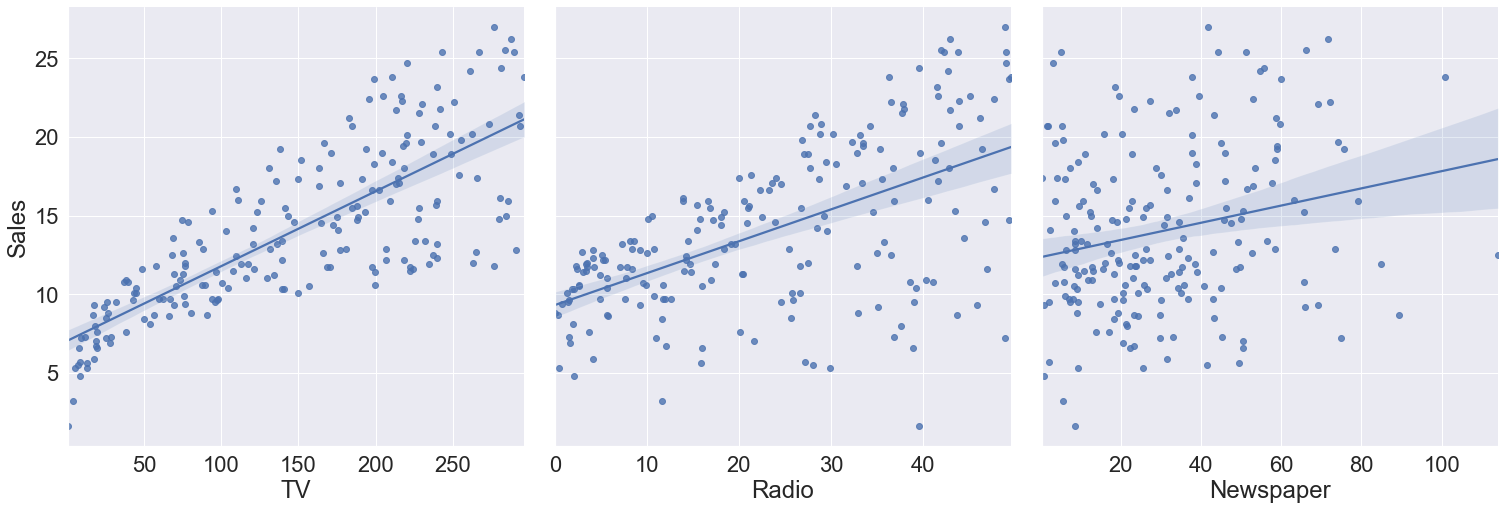

In [24]:
sns.set(font_scale=2)
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars=['Sales'],height=7,aspect=1,kind='reg')

# Use Linear Regression to predict sales based on money spent on advertising

In [28]:
X = data.iloc[:,:3]
y = data['Sales']

In [26]:
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [29]:
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

# Split X and y into training and testing sets

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


# Use Linear Regression in scikit-learn

In [32]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [36]:
list(zip(data.columns[:3],lr.coef_))

[('TV', 0.04656456787415028),
 ('Radio', 0.17915812245088836),
 ('Newspaper', 0.0034504647111804347)]

In [37]:
lr.intercept_

2.8769666223179318

## Spending an additional 1000 dollars on TV ads is associated with an increase in sales of 46.6 items

# Make predictions

In [38]:
y_pred = lr.predict(X_test)

In [39]:
y_pred

array([21.70910292, 16.41055243,  7.60955058, 17.80769552, 18.6146359 ,
       23.83573998, 16.32488681, 13.43225536,  9.17173403, 17.333853  ,
       14.44479482,  9.83511973, 17.18797614, 16.73086831, 15.05529391,
       15.61434433, 12.42541574, 17.17716376, 11.08827566, 18.00537501,
        9.28438889, 12.98458458,  8.79950614, 10.42382499, 11.3846456 ,
       14.98082512,  9.78853268, 19.39643187, 18.18099936, 17.12807566,
       21.54670213, 14.69809481, 16.24641438, 12.32114579, 19.92422501,
       15.32498602, 13.88726522, 10.03162255, 20.93105915,  7.44936831,
        3.64695761,  7.22020178,  5.9962782 , 18.43381853,  8.39408045,
       14.08371047, 15.02195699, 20.35836418, 20.57036347, 19.60636679])

## Example Evaluation metrics for regression

In [40]:
true = [100,50,30,20]
pred = [90,50,50,30]

In [41]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(true,pred)

10.0

In [42]:
from sklearn.metrics import mean_squared_error

mean_squared_error(true,pred)

150.0

In [44]:
import numpy as np
# RMSE
np.sqrt(mean_squared_error(true,pred))

12.24744871391589

In [45]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.4046514230328955

# Feature selection
## Remove newspaper from model and see what happens to RMSE

In [46]:
X = data.iloc[:,:2]
y = data.Sales

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

np.sqrt(mean_squared_error(y_test,y_pred))

1.3879034699382888